<a href="https://colab.research.google.com/github/faranbutt/Machine-Learing-MIPT/blob/main/Laplace_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split

In [7]:

iris = load_iris()
df = pd.DataFrame(
    data=iris.data,
    columns=iris.feature_names
)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
X = df[iris.feature_names].to_numpy()
y = df['target']
X.shape,y.shape

((150, 4), (150,))

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [25]:
loc0 ,scale0 = scipy.stats.laplace.fit(X_train[:,0])
loc1 ,scale1 = scipy.stats.laplace.fit(X_train[:,1])

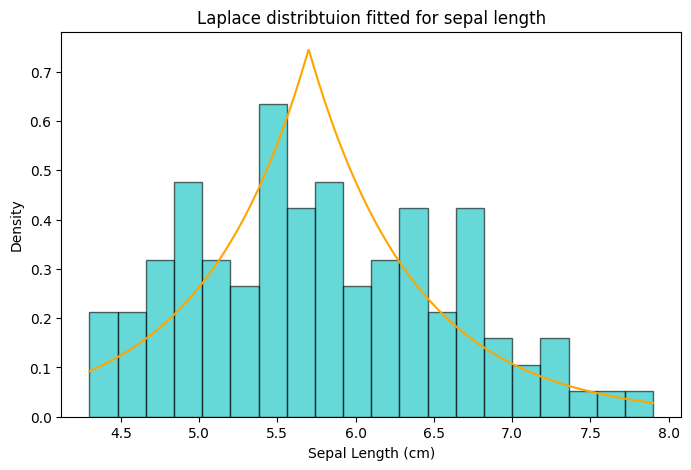

In [30]:
plt.figure(figsize = (8,5))
plt.hist(X_train[:,0],bins=20,density=True,alpha=0.6,color='c', edgecolor='black', label="Iris Sepal Length")
x_iris = np.linspace(min(X_train[:,0]),max(X_train[:,0]),1000)
pdf_iris = scipy.stats.laplace.pdf(x_iris,loc = loc0,scale = scale0)
plt.plot(x_iris,pdf_iris,c='orange',label="Fitted Laplace Pdf")
plt.title("Laplace distribtuion fitted for sepal length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Density")
plt.show()

# Laplace Distribution in Scratch

In [45]:
class LaplaceDistribution():
  @staticmethod
  def mean_absolute_deviation_from_median(x:np.ndarray):
    return np.mean(np.abs(x - np.median(x)))
  def __init__(self,features):
    self.loc = np.median(features)
    self.scale = self.mean_absolute_deviation_from_median(features)

  def log_pdf(self,values):
    return (- np.log(2*self.scale) - (np.abs(values - self.loc)/self.scale))
  def pdf(self,values):
    return np.exp(self.log_pdf(values))



In [46]:
lap = LaplaceDistribution(X_train[:,0])
lap.loc , lap.scale

(5.7, 0.6704761904761906)

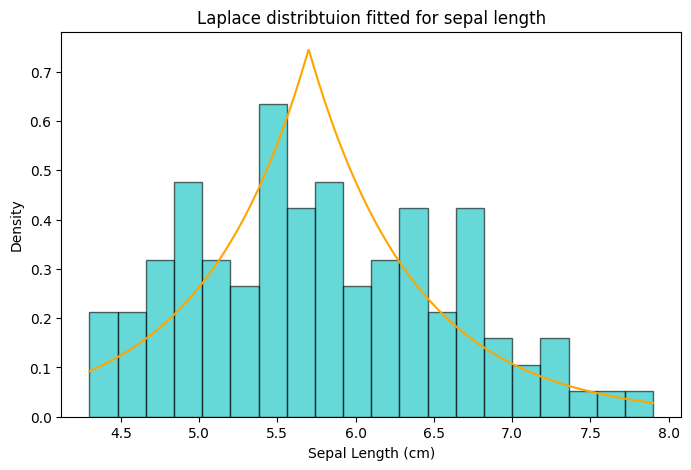

In [47]:
plt.figure(figsize = (8,5))
plt.hist(X_train[:,0],bins=20,density=True,alpha=0.6,color='c', edgecolor='black', label="Iris Sepal Length")
x_iris = np.linspace(min(X_train[:,0]),max(X_train[:,0]),1000)
lap = LaplaceDistribution(X_train[:,0])
pdf_iris = lap.pdf(x_iris)
plt.plot(x_iris,pdf_iris,c='orange',label="Fitted Laplace Pdf")
plt.title("Laplace distribtuion fitted for sepal length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Density")
plt.show()

In [34]:
scale0

0.6704761904761906

In [36]:
np.sum(np.abs(X[:,0] - np.median(X[:,0]))) / len(X[:,0])

0.6846666666666668